# Titanic predictions using KNN

In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn import metrics

%matplotlib inline
plt.rcParams['figure.figsize'] = [10,7]

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Import datasets

In [67]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
data = train_df.append(test_df)

In [68]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As observed, there are many missing values in Age and Cabin which will need to be filled

First, let's try to see how the given features are related to Survived

In [73]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


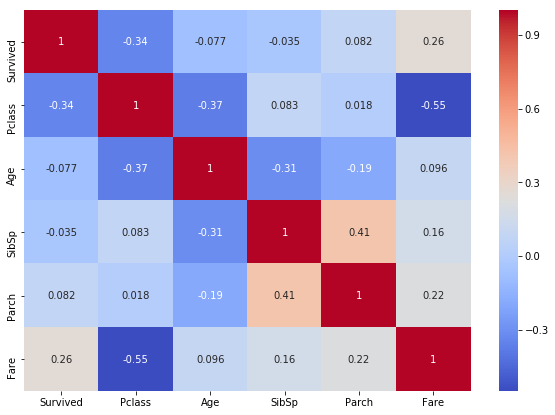

In [74]:
g = sns.heatmap(train_df.drop('PassengerId',axis=1).corr(), annot=True, cmap='coolwarm')

Upon initial inspection, Age, SibSp and Parch have very weak relationships with Survived as compared to Pclass and Age

However, there are transitive relationships such as Age, Pclass and Survived; these will need to be further inspected

The missing values will also affect correlation, which might change once those values are filled appropriately

The features Sex, Cabin, Ticket, Embarked need to be converted to integral values 

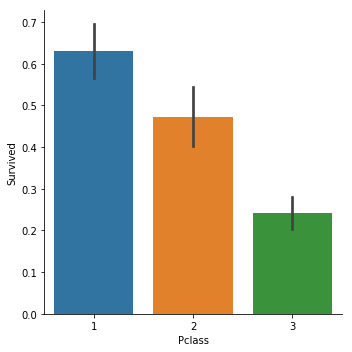

In [75]:
#Explore Pclass vs Survived
g = sns.catplot(data=train_df, y='Survived', x='Pclass', kind='bar')

As expected, the economy class of passengers affects their survival

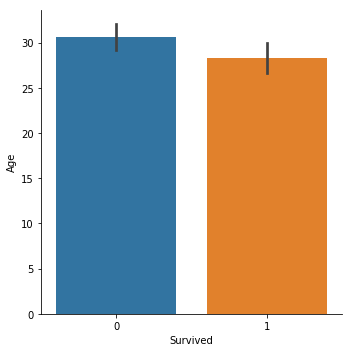

In [76]:
#Explore Age vs Survived
g = sns.catplot(data=train_df, x='Survived', y='Age', kind='bar', height=5)

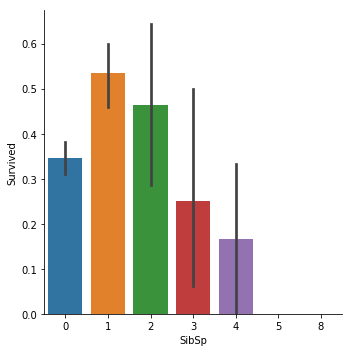

In [77]:
#Explore SibSp vs Survived
g = sns.catplot(data=train_df, x='SibSp', y='Survived', kind='bar', height=5)

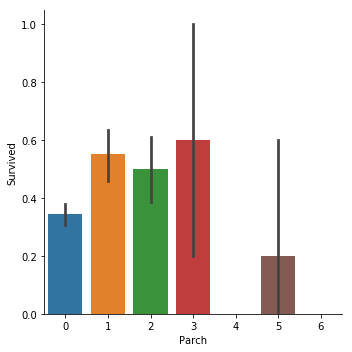

In [78]:
#Explore Parch vs Survived
g = sns.catplot(data=train_df, x='Parch', y='Survived', kind='bar', height=5)

The increased survival of passengers travelling with siblings/parents/children hints at the requirement of features 
that indicate whether a passenger was travelling with family or not.

Families had a higher survival rate than individuals

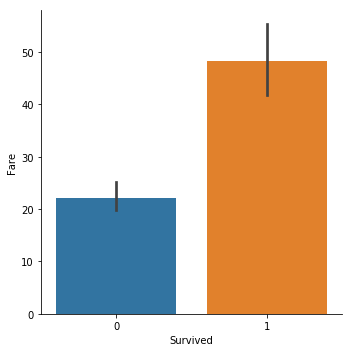

In [79]:
#Explore Fare vs Survived
g = sns.catplot(data=train_df, y='Fare', x='Survived', kind='bar', height=5)

As previously observed, the (pseudo) economic status affected survival 

The remaining features can also help in aiding and generating features 

# Feature Engineering

## Use Names to create a Title column

There are various titles across all passengers; let's simplify that into 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev'(Reverend) 

In [80]:
data['Title'] = data['Name']
for name_string in data['Name']:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=True)
data['Title'].value_counts()


Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Jonkheer      1
Dona          1
Don           1
Lady          1
Sir           1
Countess      1
Mme           1
Capt          1
Name: Title, dtype: int64

Fill the missing age values by the medians of titles for each row

In [81]:
title_changes = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data.replace({'Title': title_changes}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = data.groupby('Title')['Age'].median()[titles.index(title)]
    data.loc[(data['Age'].isnull()) & (data['Title'] == title), 'Age'] = age_to_impute
train_df['Age'] = data['Age'][:891]
test_df['Age'] = data['Age'][891:]
data.drop('Title', axis = 1, inplace = True)

Make a new feature that helps identify whether a passenger was alone or not 

In [82]:
data['Family_Size'] = data['Parch'] + data['SibSp'] + 1
train_df['Family_Size'] = data['Family_Size'][:891]
test_df['Family_Size'] = data['Family_Size'][891:]

In order to identify the family/group that each passenger belonged to, there are two approaches:

1. Check for common last name and fare
2. Check for same ticket initials



In [83]:
data['Last_Name'] = data['Name'].apply(lambda x: str.split(x, ",")[0])
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
DEFAULT_SURVIVAL_VALUE = 0.5
data['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

In [84]:
for grp, grp_df in data[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):   
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0
print("Number of passengers with family survival information:", 
      data.loc[data['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [85]:
for _, grp_df in data.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0                      
print("Number of passenger with family/group survival information: " 
      +str(data[data['Family_Survival']!=0.5].shape[0]))
train_df['Family_Survival'] = data['Family_Survival'][:891]
test_df['Family_Survival'] = data['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


Organise Fare and Age into bins alongwith encoding for various features

In [86]:
data['Fare'].fillna(data['Fare'].median(), inplace = True)
data['FareBin'] = pd.qcut(data['Fare'], 5)
label = LabelEncoder()
data['FareBin_Code'] = label.fit_transform(data['FareBin'])
train_df['FareBin_Code'] = data['FareBin_Code'][:891]
test_df['FareBin_Code'] = data['FareBin_Code'][891:]
train_df.drop(['Fare'], 1, inplace=True)
test_df.drop(['Fare'], 1, inplace=True)

In [87]:
data['AgeBin'] = pd.qcut(data['Age'], 4)
label = LabelEncoder()
data['AgeBin_Code'] = label.fit_transform(data['AgeBin'])
train_df['AgeBin_Code'] = data['AgeBin_Code'][:891]
test_df['AgeBin_Code'] = data['AgeBin_Code'][891:]
train_df.drop(['Age'], 1, inplace=True)
test_df.drop(['Age'], 1, inplace=True)

In [88]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
train_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)

In [89]:
train_df.head(10)

,Survived,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,0,3,0,2,0.5,0,0
1,1,1,1,2,0.5,4,3
2,1,3,1,1,0.5,1,1
3,1,1,1,2,0.0,4,2
4,0,3,0,1,0.5,1,2
5,0,3,0,1,0.5,1,1
6,0,1,0,1,0.5,4,3
7,0,3,0,5,0.0,2,0
8,1,3,1,3,1.0,2,1
9,1,2,1,2,0.0,3,0


In [90]:
test_df.head(10)

,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,3,0,1,0.5,0,2
1,3,1,2,0.5,0,3
2,2,0,1,0.5,1,3
3,3,0,1,0.5,1,1
4,3,1,3,1.0,2,0
5,3,0,1,0.5,1,0
6,3,1,1,0.5,0,1
7,2,0,3,1.0,3,1
8,3,1,1,0.5,0,0
9,3,0,3,0.0,3,0


# Model training and predictions

In [110]:
x = train_df.drop('Survived', axis=1)
y = train_df['Survived']

x_test = test_df.copy()

In [92]:
from sklearn.model_selection import KFold
#Stratified k fold cross validation
kfold = KFold(n_splits=10)

In [93]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)
x_test = std_scaler.transform(x_test)

In [94]:
# Store scores of all models
gs_scores = {}

In [95]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsadaDTC.fit(x,y)

ada_best = gsadaDTC.best_estimator_

#Best score 
gs_scores['Ada'] = gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    6.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                

In [96]:
# ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [None, 'auto'],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(x,y)

ExtC_best = gsExtC.best_estimator_

# Best score
gs_scores['ET'] = gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=...
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gi

In [97]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [None, 'auto'],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(x,y)

RFC_best = gsRFC.best_estimator_

# Best score
gs_scores['RFC'] = gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.5min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf...
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=-1

In [98]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [None, 'auto'] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(x,y)

GBC_best = gsGBC.best_estimator_

# Best score
gs_scores['GBC'] = gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   40.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_we...
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
   

In [99]:
# SVM

SVMC = SVC(probability=True)
svc_param_grid = {'kernel':['rbf'],
                  'gamma':[0.001,0.01,0.1,1],
                  'C':[0.1,1,10,50,100,200,300,]}
gsSVMC = GridSearchCV(SVMC, param_grid=svc_param_grid, cv=kfold, scoring='accuracy', n_jobs = -1, verbose = 1)

gsSVMC.fit(x,y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gs_scores['SVC'] = gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   23.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [100]:
# KNN

knn = KNeighborsClassifier()
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm,
               'weights': weights,
               'leaf_size': leaf_size,
               'n_neighbors': n_neighbors}

gsKNN=GridSearchCV(estimator = knn, param_grid = hyperparams, verbose=1, cv=10, scoring = "roc_auc", n_jobs=-1)

gsKNN.fit(x, y)

knn_best = gsKNN.best_estimator_

# Best score
gs_scores['KNN'] = gsKNN.best_score_

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2350 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    8.5s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto'],
                         'leaf_size': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'n_neighbors': [6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20,
                                         22],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [101]:
gs_scores_df = pd.DataFrame(gs_scores, index=[0])
gs_scores_df

,Ada,ET,RFC,GBC,SVC,KNN
0,0.835017,0.854097,0.841751,0.852974,0.84624,0.879492


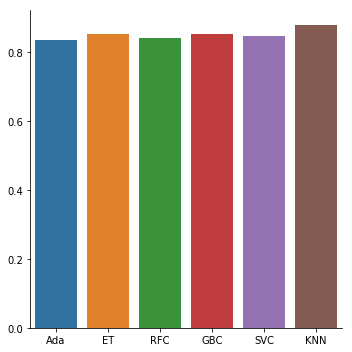

In [102]:
g = sns.catplot(data=gs_scores_df,kind='bar')

In [113]:
# def get_reduced_features(models):
#     model_num=1
#     for model in models:
#         print('Model', model_num)
#         rfecv = RFECV(estimator=model, step=1, cv=kfold, scoring='accuracy')
#         rfecv.fit(x,y)
#         print('Optimal no. of features: ', rfecv.n_features_)
#         feat_support = rfecv.support_
#         feat_grid_score = rfecv.grid_scores_
#         print('Selected columns are: ', *x.columns[feat_support])
#         print('Not selected columns are: ', *x.columns[feat_support!=True])
#         print('Cross val score: ', feat_grid_score.mean(), end='\n\n')
#         model_num+=1
    

# get_reduced_features([RFC_best,ExtC_best,ada_best,GBC_best])

Model 1
Optimal no. of features:  6
Selected columns are:  Pclass Sex Family_Size Family_Survival FareBin_Code AgeBin_Code
Not selected columns are: 
Cross val score:  0.8142655014565127

Model 2
Optimal no. of features:  6
Selected columns are:  Pclass Sex Family_Size Family_Survival FareBin_Code AgeBin_Code
Not selected columns are: 
Cross val score:  0.8204348730753225

Model 3
Optimal no. of features:  6
Selected columns are:  Pclass Sex Family_Size Family_Survival FareBin_Code AgeBin_Code
Not selected columns are: 
Cross val score:  0.8183624635871828

Model 4
Optimal no. of features:  6
Selected columns are:  Pclass Sex Family_Size Family_Survival FareBin_Code AgeBin_Code
Not selected columns are: 
Cross val score:  0.8249146899708698

Model 5


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [ ]:
# votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
# ('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best), ('knn',knn_best)], voting='soft', n_jobs=-1)

# votingC = votingC.fit(x,y)

# from sklearn.model_selection import cross_val_score
# print(cross_val_score(votingC, x, y, cv=10).mean())

In [115]:
#Get predictions for test data
# y_pred = votingC.predict(x_test)
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform')
knn.fit(x, y)
y_pred = knn.predict(x_test)

In [ ]:
temp = pd.DataFrame(pd.read_csv("/kaggle/input/titanic/test.csv")['PassengerId'])
temp['Survived'] = y_pred
temp.to_csv("../working/submission.csv", index = False)
print("Predictions submitted")